In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "DeepLearning/DeepLearningProject/Project"
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = None
assert GOOGLE_DRIVE_PATH_AFTER_MYDRIVE is not None
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['man.jpg', 'woman.jpg', 'swim.jpg', 'FullCNNversion', 'DeepLearningProjectTemplate.ipynb', 'Alpha_Version.ipynb']


In [ ]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)


In [ ]:
# Get images
image_path = os.path.join(GOOGLE_DRIVE_PATH, 'woman.jpg')
image = img_to_array(load_img(image_path))
image = np.array(image, dtype=float)

In [ ]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [ ]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.fit(x=X,
    y=Y,
    batch_size=1,
    epochs=1000)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.4966
Epoch 2/1000
1/1 [==============================] - 0s 395ms/step - loss: 0.7603
Epoch 3/1000
1/1 [==============================] - 0s 393ms/step - loss: 0.0868
Epoch 4/1000
1/1 [==============================] - 0s 397ms/step - loss: 0.3800
Epoch 5/1000
1/1 [==============================] - 0s 384ms/step - loss: 0.1605
Epoch 6/1000
1/1 [==============================] - 0s 392ms/step - loss: 0.0095
Epoch 7/1000
1/1 [==============================] - 0s 423ms/step - loss: 0.0091
Epoch 8/1000
1/1 [==============================] - 1s 638ms/step - loss: 0.0088
Epoch 9/1000
1/1 [==============================] - 1s 697ms/step - loss: 0.0086
Epoch 10/1000
1/1 [==============================] - 1s 688ms/step - loss: 0.0083
Epoch 11/1000
1/1 [==============================] - 1s 672ms/step - loss: 0.0081
Epoch 12/1000
1/1 [==============================] - 1s 647ms/step - loss: 0.0079
Epoch 13/1000
1/1 [=========

1/1 [==============================] - 0s 305ms/step - loss: 7.4237e-04
0.0007423742208629847
1/1 [==============================] - 0s 229ms/step


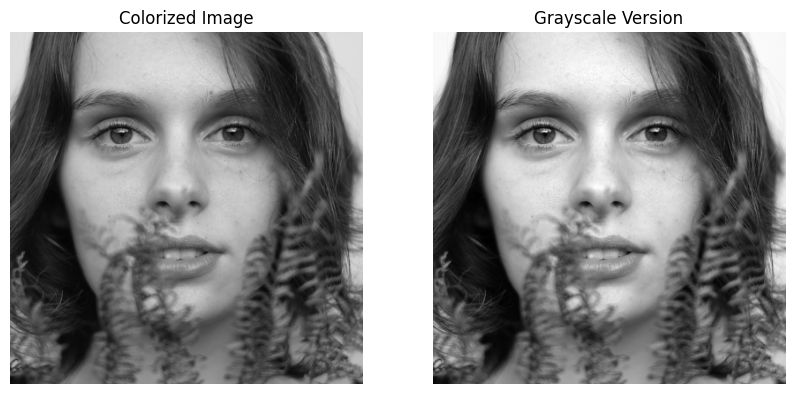

In [ ]:
import matplotlib.pyplot as plt

print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output_uint8 = np.uint8(output[0])
output_uint8 *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output_uint8

# Display the output images
plt.figure(figsize=(10, 5))

# Display the colorized image
plt.subplot(1, 2, 1)
plt.imshow(lab2rgb(cur))
plt.title('Colorized Image')
plt.axis('off')

# Display the grayscale version of the colorized image
plt.subplot(1, 2, 2)
plt.imshow(rgb2gray(lab2rgb(cur)), cmap='gray')
plt.title('Grayscale Version')
plt.axis('off')

plt.show()

In [ ]:
# Evaluate model
mse = model.evaluate(X, Y, batch_size=1)
print("Mean Squared Error (MSE):", mse)

1/1 [==============================] - 0s 130ms/step - loss: 7.4237e-04
Mean Squared Error (MSE): 0.0007423742208629847


In [ ]:
psnr = 20 * np.log10(1.0 / np.sqrt(mse))
print("Peak Signal-to-Noise Ratio (PSNR):", psnr)

Peak Signal-to-Noise Ratio (PSNR): 31.29377117515675
